In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv('Ice_cream selling data.csv')

In [103]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [104]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [105]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

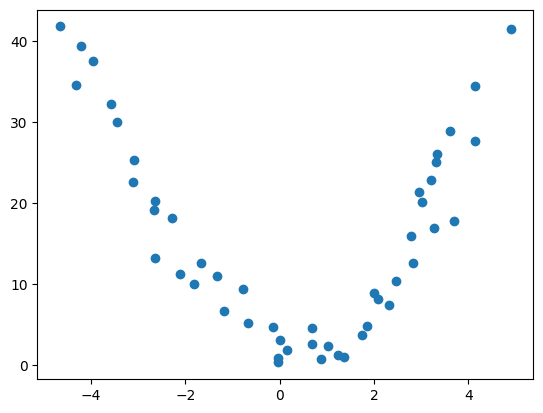

In [106]:
plt.scatter(x=df['Temperature (°C)'],y=df['Ice Cream Sales (units)'])

In [107]:
X= df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
ply=PolynomialFeatures(degree=2)

In [112]:
x_train_poly=ply.fit_transform(X_train)
x_test_poly=ply.transform(X_test)


In [113]:
#bunun ustune linear reg uygulanacak
from sklearn.linear_model import LinearRegression

In [114]:
regression=LinearRegression()

In [115]:
regression.fit(x_train_poly, y_train)

LinearRegression()

Text(0.5, 1.0, 'Ice Cream Sales Prediction')

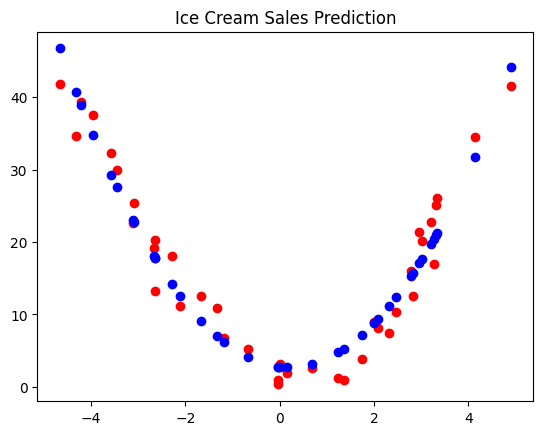

In [125]:
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, regression.predict(ply.transform(X_train)), color='blue')
plt.title('Ice Cream Sales Prediction')

In [117]:
#r2 score
from sklearn.metrics import r2_score
r2=r2_score(y_test, regression.predict(x_test_poly))
print(r2)

0.843055137193884


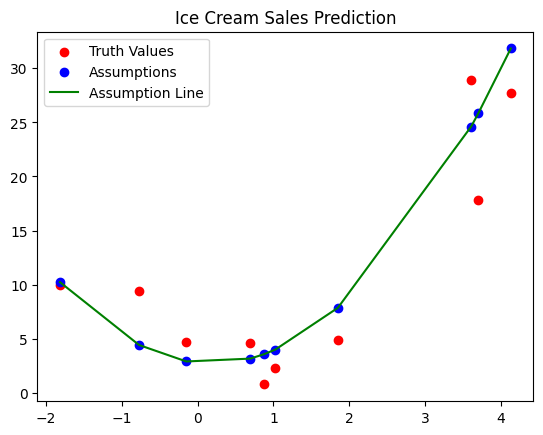

In [132]:
#plotting
y_test_pred = regression.predict(x_test_poly)
import numpy as np
import matplotlib.pyplot as plt


# Sort the data for plotting purposes
sorted_indices = np.argsort(X_test.values.flatten())  # Use .values to get the underlying array
X_test_sorted = X_test.values[sorted_indices]
y_test_pred_sorted = y_test_pred[sorted_indices]

# Plot
plt.scatter(X_test, y_test, color='red', label='Truth Values ')
plt.scatter(X_test, regression.predict(x_test_poly), color='blue', label='Assumptions')
plt.plot(X_test_sorted, y_test_pred_sorted, color='green', label='Assumption Line')  # Sorted prediction line
plt.title('Ice Cream Sales Prediction')
plt.legend()
plt.show()

